# Mobile Sales


* The Mobile Sales dataset contains 3,835 records and 14 columns, capturing key information about mobile transactions, including details like brand, model, price, units sold, customer demographics, city, payment method, and customer ratings. Each record represents a unique sale, providing insights into sales performance, customer preferences, and pricing trends. strong foundation for business and market analysis in the mobile retail sector

## Import Necessary libraries

In [74]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

## Import dataset

In [75]:
df = pd.read_csv(r"C:\Users\User159\Desktop\PROJECTS\PowerBI-Project-Mobile Sales\Mobile Sales Data - Copy.csv")
df.head()

,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9


## Information Of Dataset

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    3835 non-null   int64  
 1   Day               3835 non-null   int64  
 2   Month             3835 non-null   int64  
 3   Year              3835 non-null   int64  
 4   Day Name          3835 non-null   object 
 5   Brand             3835 non-null   object 
 6   Units Sold        3835 non-null   int64  
 7   Price Per Unit    3835 non-null   float64
 8   Customer Name     3835 non-null   object 
 9   Customer Age      3835 non-null   int64  
 10  City              3835 non-null   object 
 11  Payment Method    3835 non-null   object 
 12  Customer Ratings  3835 non-null   int64  
 13  Mobile Model      3835 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 419.6+ KB


## Stastical Information Of Dataset

In [77]:
df.describe()

,Transaction ID,Day,Month,Year,Units Sold,Price Per Unit,Customer Age,Customer Ratings
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,1918.000000,15.703781,6.527249,2022.765319,4.993481,40114.036816,38.098305,3.693090
std,1107.213469,8.822771,3.452030,0.917401,2.581122,17310.488427,12.110622,1.325069
min,1.000000,1.000000,1.000000,2021.000000,1.000000,10011.110000,18.000000,1.000000
25%,959.500000,8.000000,4.000000,2022.000000,3.000000,25617.405000,27.500000,3.000000
50%,1918.000000,16.000000,7.000000,2023.000000,5.000000,40136.490000,38.000000,4.000000
75%,2876.500000,23.000000,10.000000,2024.000000,7.000000,54973.475000,49.000000,5.000000
max,3835.000000,31.000000,12.000000,2024.000000,9.000000,69984.480000,59.000000,5.000000


## Missing values

In [78]:
df.isnull().sum()

Transaction ID      0
Day                 0
Month               0
Year                0
Day Name            0
Brand               0
Units Sold          0
Price Per Unit      0
Customer Name       0
Customer Age        0
City                0
Payment Method      0
Customer Ratings    0
Mobile Model        0
dtype: int64

## Duplicate Values

In [79]:
df.duplicated().sum()

0

## Feature Engineering

Create new useful columns.

In [90]:
# Create derived columns 
df['Sales'] = df['Units Sold'] * df['Price Per Unit']

## Summary Metrics

In [82]:
total_revenue = df['Sales'].sum()
total_units = df['Units Sold'].sum()
num_transactions = df['Transaction ID'].nunique()
avg_order_value = df.groupby('Transaction ID')['Sales'].sum().mean()

print("Total revenue:", total_revenue)
print("Total units:", total_units)
print("Num transactions:", num_transactions)
print("Avg order value:", avg_order_value)



Total revenue: 769204987.97
Total units: 19150
Num transactions: 3835
Avg order value: 200574.9642685789


## Distribution 

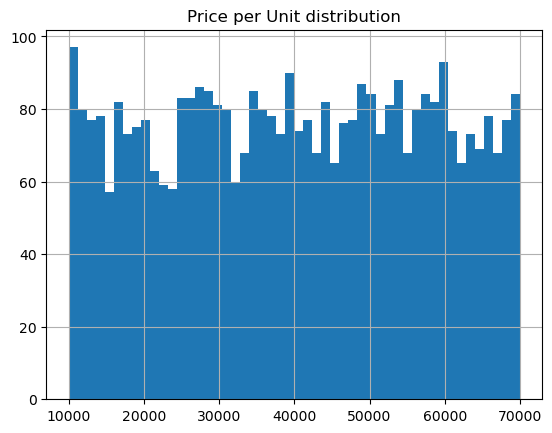

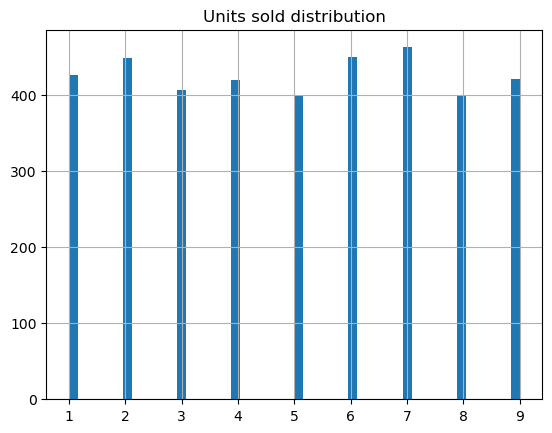

In [91]:
df['Price Per Unit'].hist(bins=50); plt.title('Price per Unit distribution'); plt.show()
df['Units Sold'].hist(bins=50); plt.title('Units sold distribution'); plt.show()


## Time Seris Analysis

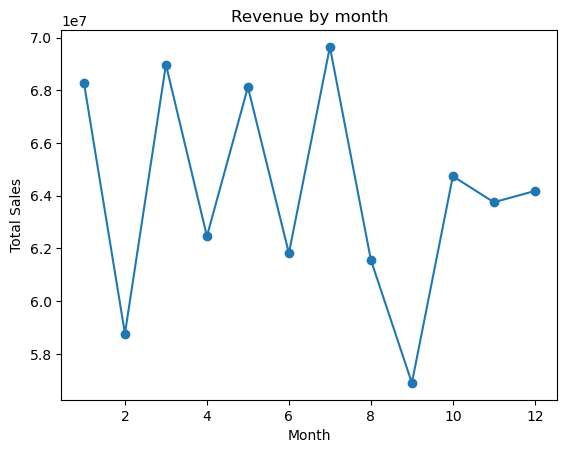

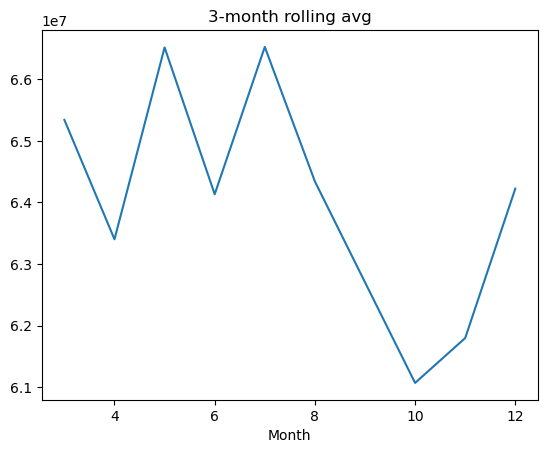

In [84]:
ts = df.groupby('Month')['Sales'].sum().sort_index()
ts.plot(marker='o'); plt.title('Revenue by month'); plt.xlabel('Month'); plt.ylabel('Total Sales'); plt.show()
# rolling average
ts.rolling(3).mean().plot(); plt.title('3-month rolling avg'); plt.show()


## Calculate Brand Revenue

In [85]:
brand_revenue = df.groupby("Brand")["Sales"].sum().sort_values(ascending=False).head(10)

## Top 10 Brands by Total Revenue

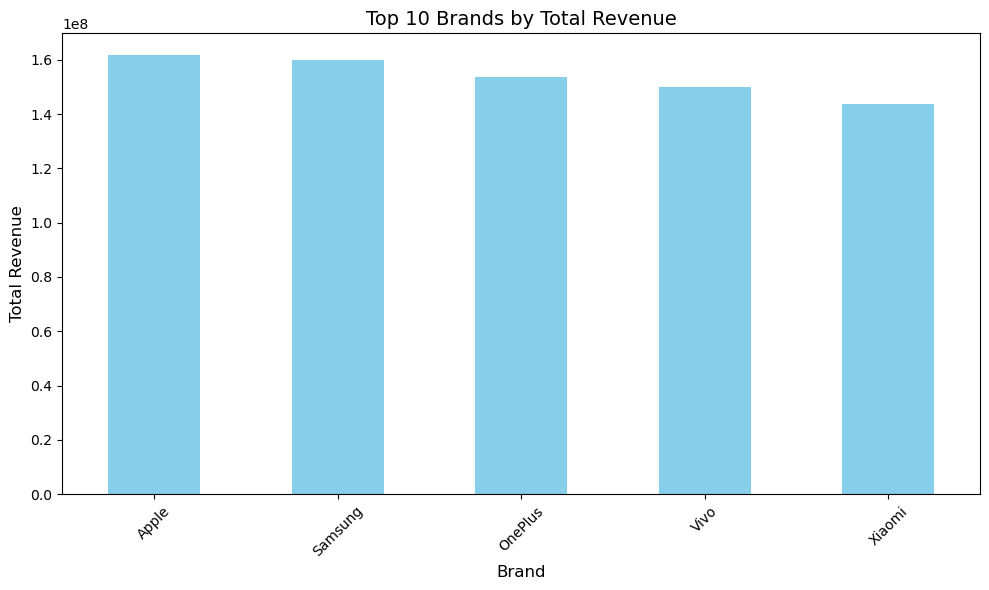

In [86]:
plt.figure(figsize=(10,6))
brand_revenue.plot(kind='bar', color='skyblue')
plt.title("Top 10 Brands by Total Revenue", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top10_brands_revenue.png", bbox_inches='tight')
plt.show()

## City-wise Total Units Sold 

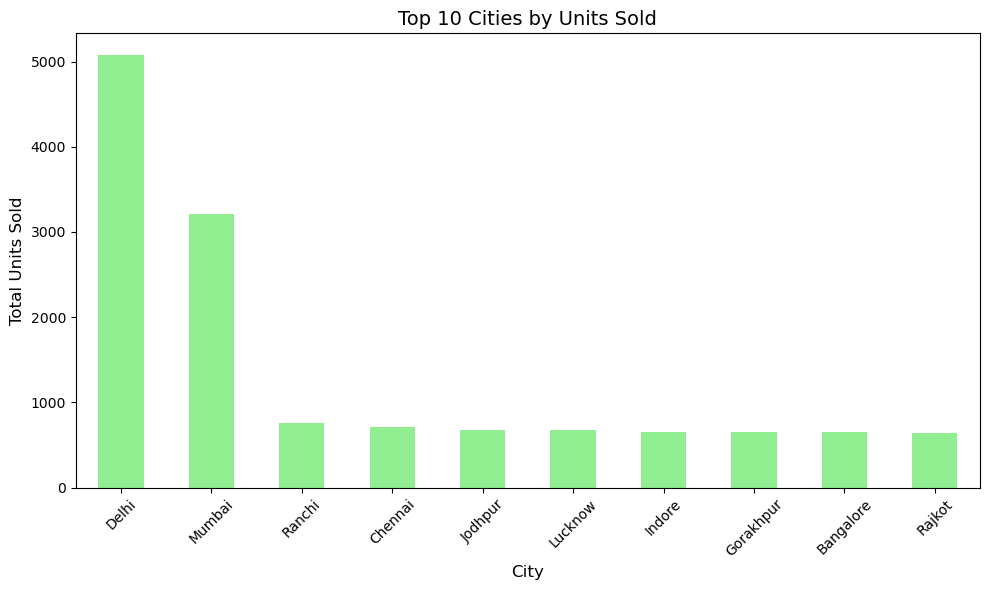

In [87]:
city_sales = df.groupby("City")["Units Sold"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
city_sales.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Cities by Units Sold", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Units Sold", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top10_cities_units_sold.png", bbox_inches='tight')
plt.show()

##  Average Customer Ratings by Brand

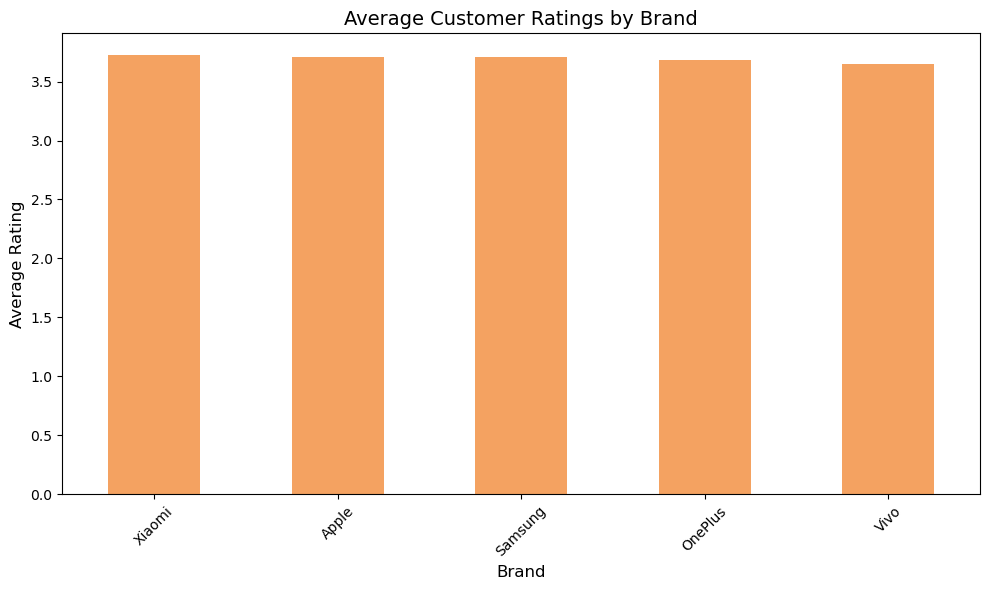

In [88]:
rating_by_brand = df.groupby("Brand")["Customer Ratings"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
rating_by_brand.plot(kind='bar', color='#f4a261')
plt.title("Average Customer Ratings by Brand", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("avg_rating_by_brand.png", bbox_inches='tight')
plt.show()

## Correlation

In [89]:
df[['Units Sold','Price Per Unit','Sales']].corr()

,Units Sold,Price Per Unit,Sales
Units Sold,1.000000,0.005961,0.734564
Price Per Unit,0.005961,1.000000,0.605119
Sales,0.734564,0.605119,1.000000


## Outlier Detection

Check for extreme values that may distort analysis.

In [92]:
Q1 = df["Price Per Unit"].quantile(0.25)
Q3 = df["Price Per Unit"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Price Per Unit"] < (Q1 - 1.5 * IQR)) | (df["Price Per Unit"] > (Q3 + 1.5 * IQR))]


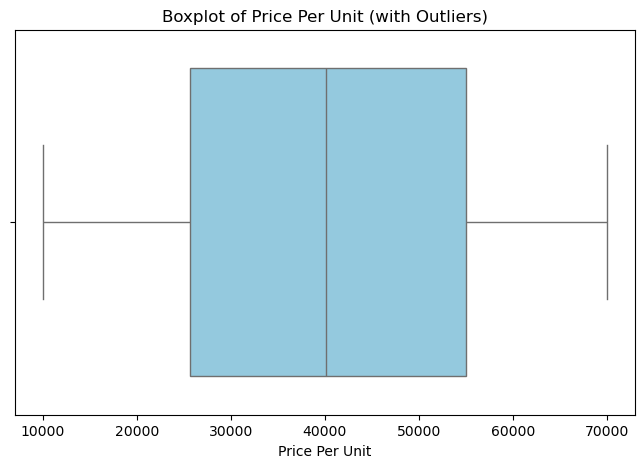

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Price Per Unit"], color="skyblue")
plt.title("Boxplot of Price Per Unit (with Outliers)")
plt.xlabel("Price Per Unit")
plt.show()


##  Outlier For All Numeric Columns

In [94]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"Column: {col}")
    print(f"Outliers count: {outliers.shape[0]}")
    print("-" * 50)


Column: Transaction ID
Outliers count: 0
--------------------------------------------------
Column: Day
Outliers count: 0
--------------------------------------------------
Column: Month
Outliers count: 0
--------------------------------------------------
Column: Year
Outliers count: 0
--------------------------------------------------
Column: Units Sold
Outliers count: 0
--------------------------------------------------
Column: Price Per Unit
Outliers count: 0
--------------------------------------------------
Column: Customer Age
Outliers count: 0
--------------------------------------------------
Column: Customer Ratings
Outliers count: 0
--------------------------------------------------
Column: Sales
Outliers count: 30
--------------------------------------------------
